# skeleton_plot demo

In [1]:
%load_ext autoreload
%autoreload 2

import skeleton_plot as skelplot
import skeleton_plot.skel_io as skel_io
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Set some paths to neuron skeleton data

In [2]:
# various google cloud paths

# raw skeleton files
skel_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/"
skel_dir = "864691134884807418_518848"
skel_filename = "864691134884807418_518848.swc"

# upright
upright_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/upright/BIL_excitatory/"

# layer aligned
layer_aligned_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/layer_align/BIL_excitatory/"

# polygon files (layer bounds for each cell)
# gives 2d shape for each layer
layer_bounds_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/poly_files/BIL_polys/"

# average layer bounds from IVSCC (to which layer aligned celled are alligned)
# this just gives a single value for each layer (straight line)
layer_bounds_average_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/"
avg_layerdepths_filename = "mouse_me_and_met_avg_layer_depths.json"

# mesh path
mw_path = "https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/"


This dictionary indicates the borders of different cortical layers:

In [3]:
# successful run
depths = skel_io.read_json(layer_bounds_average_path, avg_layerdepths_filename)
depths


{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [4]:
# should raise error
try:
    depths = skel_io.read_json("layer_bounds_average_path", "avg_layerdepths_filename")
except Exception as e:
    print(f"Raised error: {e}")


Raised error: 
    Cloud Path must conform to [FORMAT://]PROTOCOL://PATH
    Examples: 
      precomputed://gs://test_bucket/em
      gs://test_bucket/em
      graphene://https://example.com/image/em

    Supported Formats: None (precomputed), graphene, precomputed, boss, n5
    Supported Protocols: gs, file, s3, http, https, mem, matrix, tigerdata

    Cloud Path Recieved: layer_bounds_average_path
  


## Simple neuron plots

Below we start with the simplest neuron plot

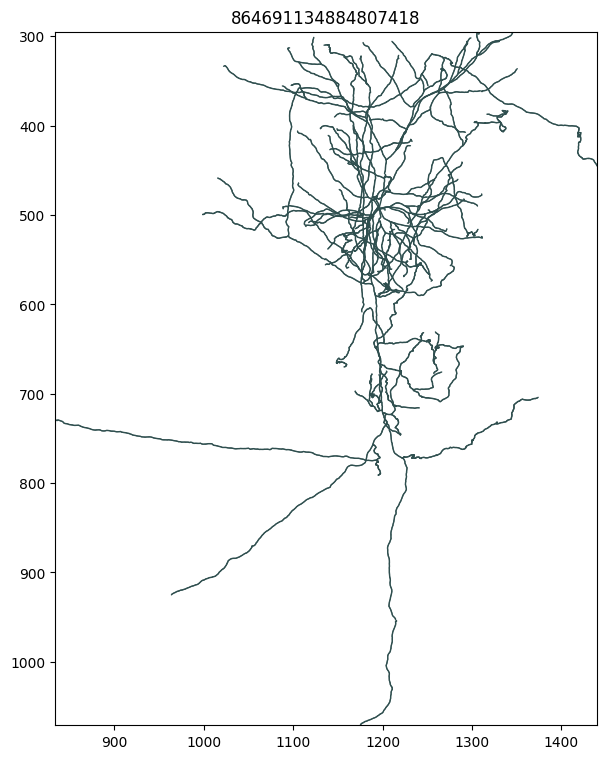

In [5]:
# plot the radius from the swc
rid = 864691134884807418
sid = 518848
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")

# plot with constant radius
f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_skel(
    sk,
    title=rid,
    line_width=1,
    invert_y=True,
)

We can add a location for the soma, and color by annotations for neuron compartment 
(axon, dendrite, etc.)

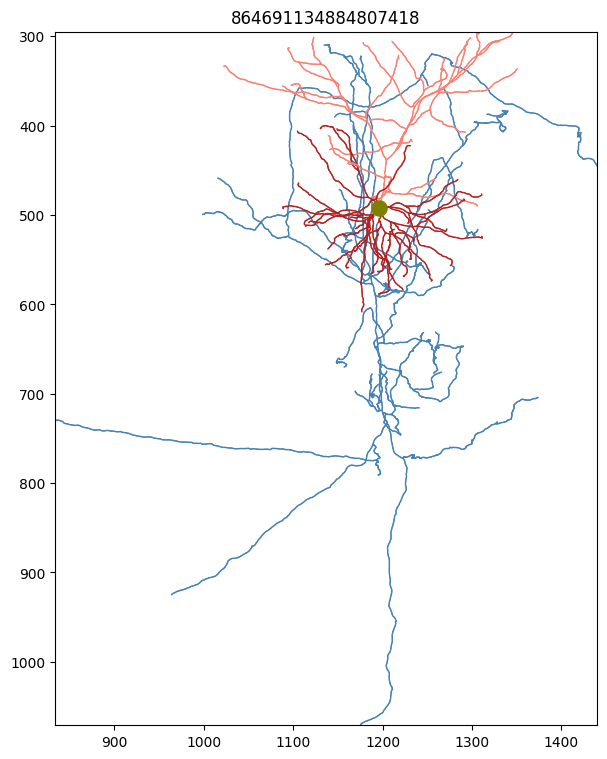

In [6]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    title=rid,
    line_width=1,
    plot_soma=True,
    invert_y=True,
    pull_compartment_colors=True,
)


We can also plot the skeleton with its radius at each point.

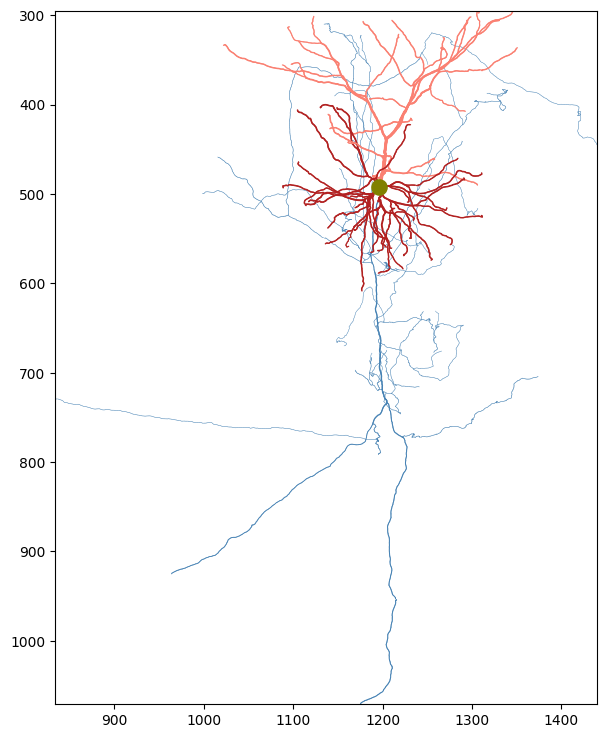

In [7]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    ax=ax,
    pull_radius=True,
    pull_compartment_colors=True,
    invert_y=True,
    plot_soma=True,
    line_width=3,
    color="darkslategray",
)

We can easily change the coordinates which are plotted.

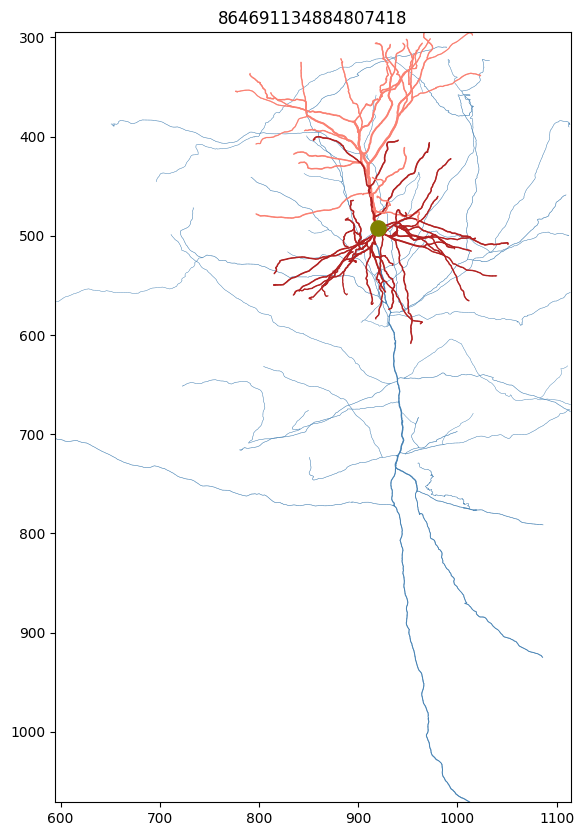

In [8]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    ax=ax,
    title=rid,
    pull_radius=True,
    pull_compartment_colors=True,
    invert_y=True,
    plot_soma=True,
    x="z",
    y="y",
    line_width=3,
)


## Examine other example neurons

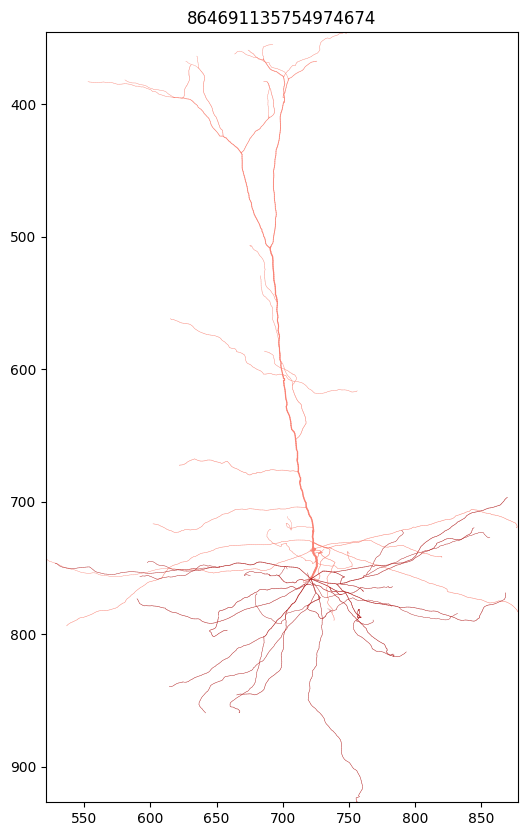

In [9]:
# plot some thicker skeletons with radius map
rid = 864691135754974674
sid = 300897
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")
f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_skel(
    sk,
    title=rid,
    pull_radius=True,
    invert_y=True,
    line_width=1,
    pull_compartment_colors=True,
)


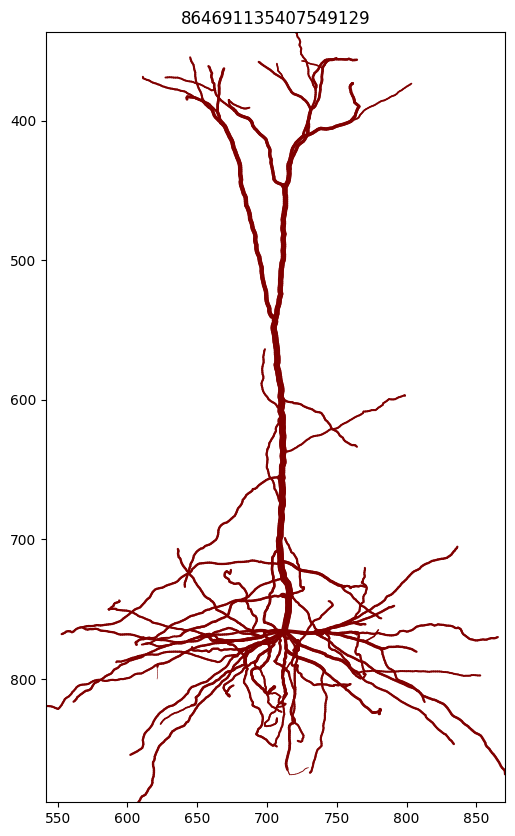

In [10]:
rid = 864691135407549129
sid = 265045
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")
f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_skel(
    sk, title=rid, pull_radius=True, invert_y=True, line_width=5, color="maroon"
)


,id,type,x,y,z,radius,parent
0,0,1,755.840,737.664,881.360,6.817,-1
1,1,4,757.408,730.578,879.278,0.655,0
2,2,4,757.721,729.161,878.862,0.655,1
3,3,4,758.035,727.744,878.446,0.655,2
4,4,4,758.348,726.326,878.029,0.655,3
...,...,...,...,...,...,...,...
3856,3856,3,780.095,745.130,896.535,0.403,3855
3857,3857,3,781.293,745.270,897.443,0.403,3856
3858,3858,3,782.406,745.245,898.459,0.403,3857
3859,3859,3,783.343,745.280,899.313,0.403,3858


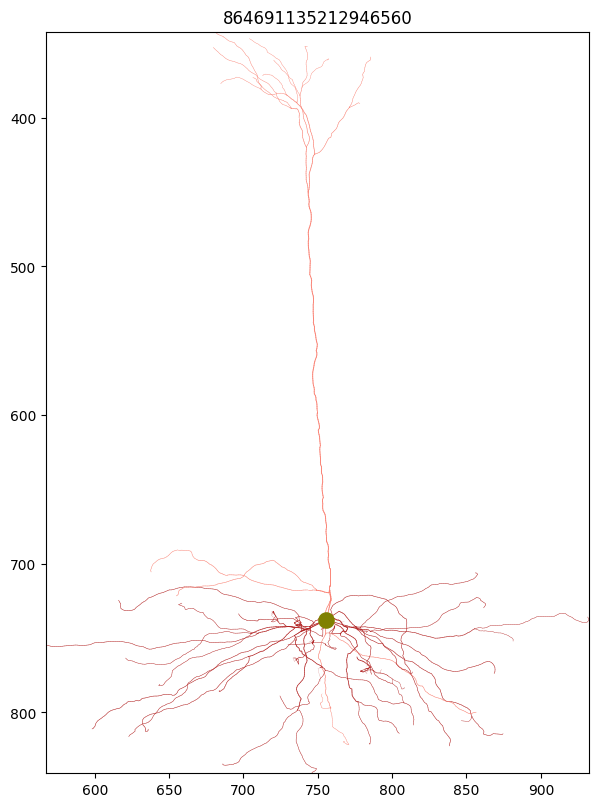

In [11]:
rid = 864691135212946560
sid = 301225
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")
f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_skel(
    sk,
    title=rid,
    pull_radius=True,
    invert_y=True,
    line_width=1,
    plot_soma=True,
    pull_compartment_colors=True,
)

swc_path = f"{skel_path}{rid}_{sid}/{rid}_{sid}.swc"
skel_io.read_swc(swc_path)


Vertex, edge, radius, and color information can all be passed in manually.

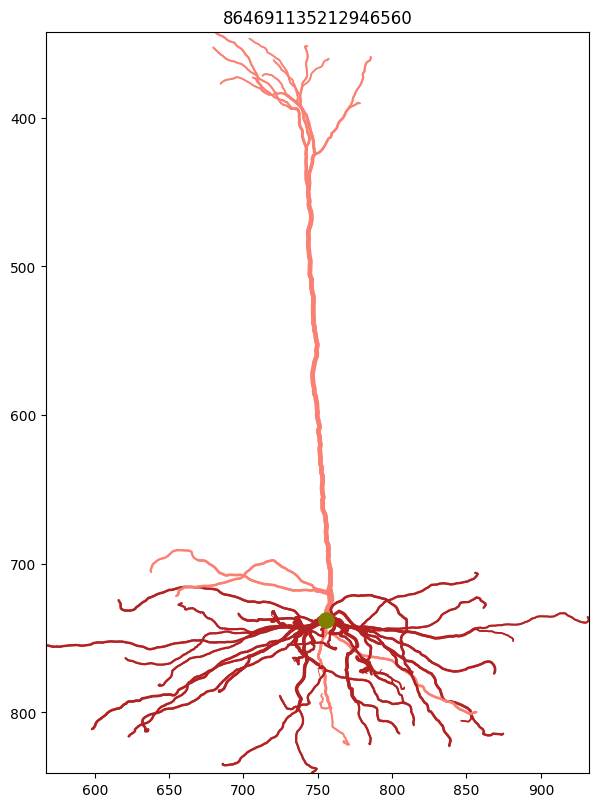

In [12]:
rid = 864691135212946560
sid = 301225
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")
f, ax = plt.subplots(figsize=(7, 10))


skelplot.plot_tools.plot_verts(
    sk.vertices[:, [0, 1]],
    sk.edges,
    radius=sk.vertex_properties["radius"],
    skel_colors=sk.vertex_properties["compartment"],
    title=rid,
    invert_y=True,
    line_width=5,
    plot_soma=True,
)

swc_path = f"{skel_path}{rid}_{sid}/{rid}_{sid}.swc"

df = skel_io.read_swc(swc_path)


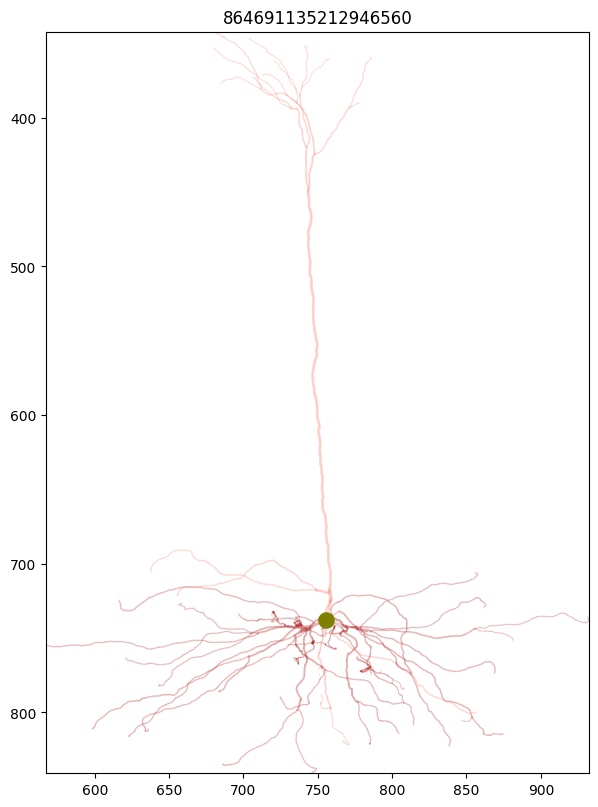

In [13]:
rid = 864691135212946560
sid = 301225
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")
f, ax = plt.subplots(figsize=(7, 10))


skelplot.plot_tools.plot_verts(
    sk.vertices,
    sk.edges,
    skel_colors=sk.vertex_properties["compartment"],
    radius=sk.vertex_properties["radius"],
    title=rid,
    skel_alpha=0.2,
    invert_y=True,
    line_width=3,
    plot_soma=True,
)

swc_path = f"{skel_path}{rid}_{sid}/{rid}_{sid}.swc"
df = skel_io.read_swc(swc_path)


## Plotting with additional features

Neurons can also be plotted with their synapses.

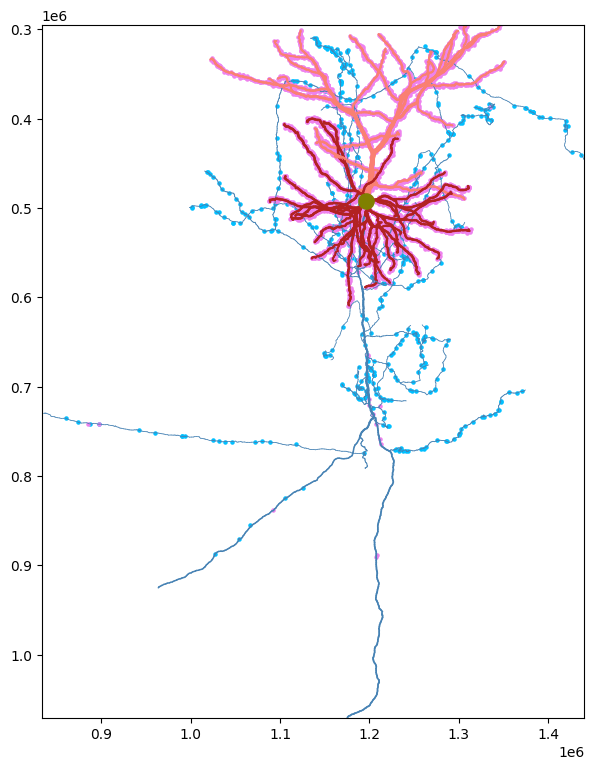

In [14]:
# test plot_mw_skel

rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

mw = skel_io.load_mw(mw_path, filename)
f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_mw_skel(
    mw,
    pull_radius=True,
    invert_y=True,
    line_width=5,
    plot_soma=True,
    pull_compartment_colors=True,
    plot_presyn=True,
    plot_postsyn=True,
)


Again, aspects of the appearance can be easily changed.

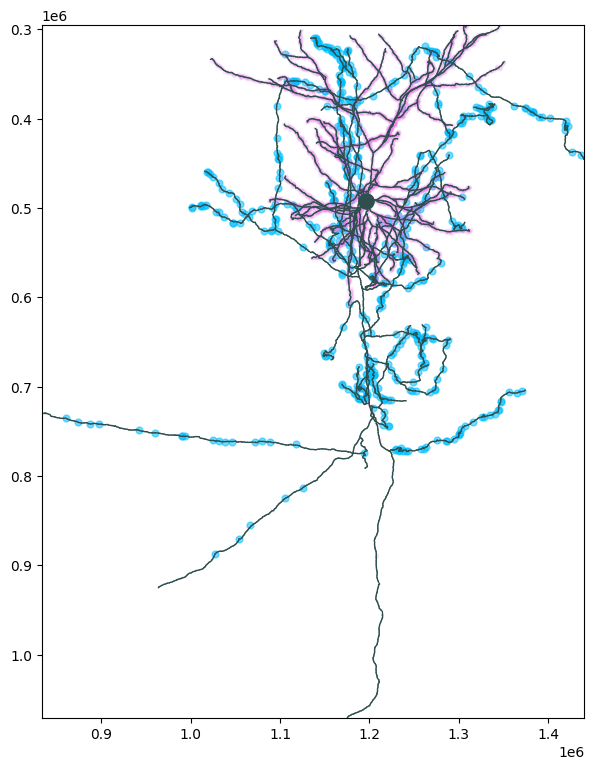

In [15]:
rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_mw_skel(
    mw,
    pull_radius=False,
    invert_y=True,
    line_width=1,
    plot_soma=True,
    pull_compartment_colors=False,
    plot_presyn=True,
    plot_postsyn=True,
    presyn_alpha=0.55,
    presyn_size=24,
    postsyn_alpha=0.1,
)


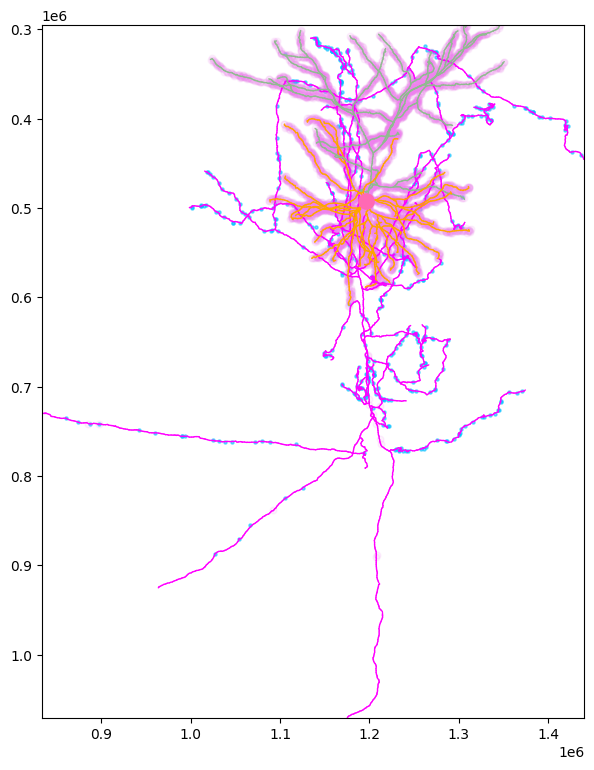

In [16]:
rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

compartment_colors = {3: "orange", 4: "darkseagreen", 2: "magenta", 1: "hotpink"}

f, ax = plt.subplots(figsize=(7, 10))

skelplot.plot_tools.plot_mw_skel(
    mw,
    pull_radius=False,
    invert_y=True,
    line_width=1,
    plot_soma=True,
    pull_compartment_colors=True,
    plot_presyn=True,
    plot_postsyn=True,
    presyn_alpha=0.55,
    postsyn_size=24,
    postsyn_alpha=0.1,
    skel_color_map=compartment_colors,
)


We can also add lines denoting the borders between cortical layers.

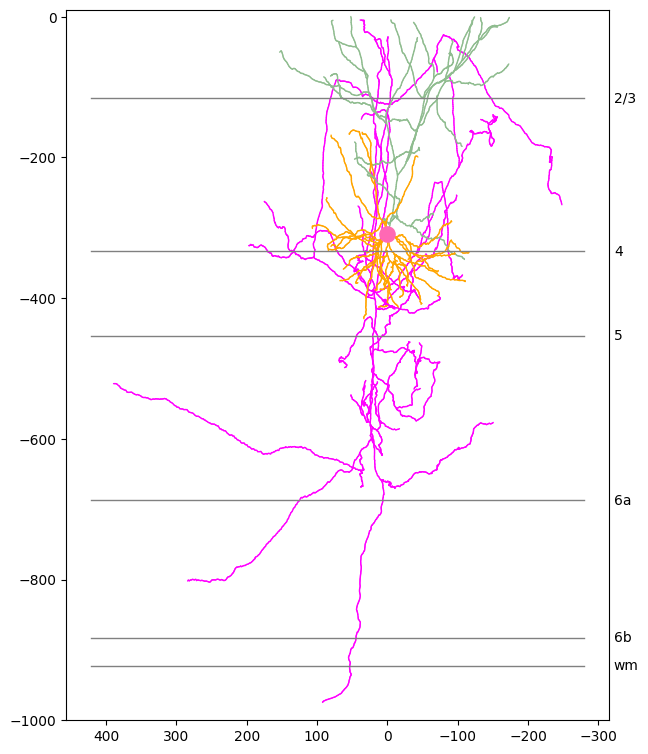

In [17]:
# plot layers on this
# I will load a layer aligned skeleton and plot average layer bounds on that
sk = skel_io.read_skeleton(layer_aligned_path, f"{sid}.swc")

f, ax = plt.subplots(figsize=(7, 14))

skelplot.plot_tools.plot_skel(
    sk,
    line_width=1,
    plot_soma=True,
    skel_color_map=compartment_colors,
    pull_compartment_colors=True,
    y_min_max=[10, -1_000],
    invert_y=True,
)
skelplot.plot_tools.plot_layer_lines(
    np.array(list(depths.values())) * [-1],
    ax=ax,
    labels=list(depths.keys()),
    line_styles={"color": "gray", "linewidth": 1, "linestyle": "-"},
    buffer_space=-1.06,
)
ax.invert_xaxis()


In [18]:
mw.seg_id


864691134884807418

The plotting appearance of these lines can also be changed.

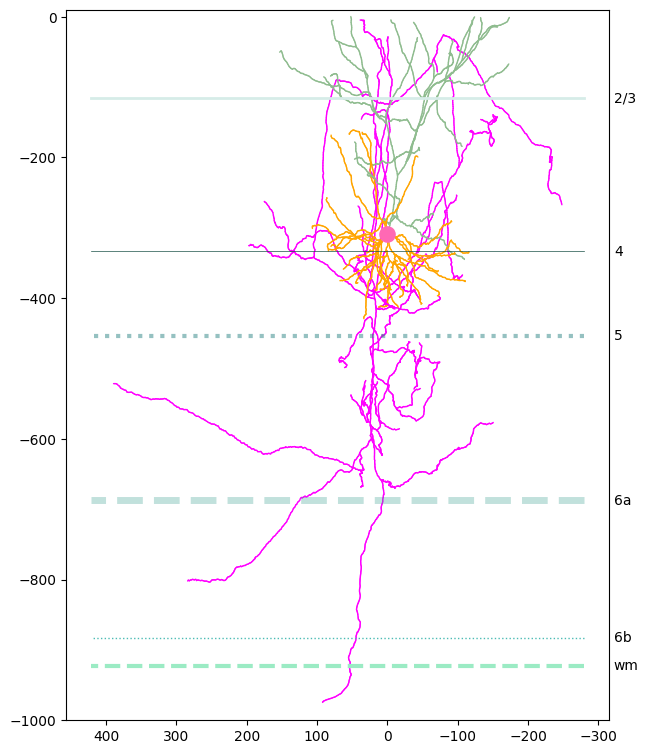

In [19]:
# plot layers that are different from each other
f, ax = plt.subplots(figsize=(7, 14))


line_styles = [
    {"color": "#d6ece8", "linewidth": 2, "linestyle": "-"},
    {"color": "#195046", "linewidth": 0.5, "linestyle": "-"},
    {"color": "#2c8484", "linewidth": 3, "linestyle": ":", "alpha": 0.5},
    {"color": "#349c8c", "linewidth": 5, "linestyle": "--", "alpha": 0.3},
    {"color": "#4cbcb4", "linewidth": 1, "linestyle": ":"},
    {"color": "#9bebc4", "linewidth": 3, "linestyle": "--"},
    {"color": "#2c6652", "linewidth": 1.5, "linestyle": "-"},
]

sk = skel_io.read_skeleton(layer_aligned_path, f"{sid}.swc")


skelplot.plot_tools.plot_skel(
    sk,
    line_width=1,
    plot_soma=True,
    skel_color_map=compartment_colors,
    pull_compartment_colors=True,
    y_min_max=[10, -1_000],
    invert_y=True,
)
skelplot.plot_tools.plot_layer_lines(
    np.array(list(depths.values())) * [-1],
    ax=ax,
    labels=list(depths.keys()),
    line_styles=line_styles,
    buffer_space=-1.06,
)
ax.invert_xaxis()


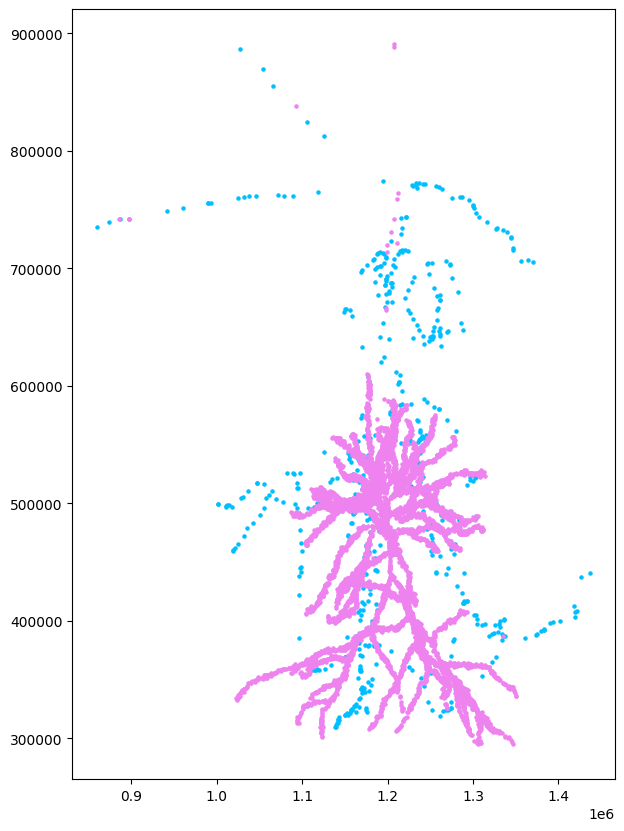

In [20]:
# just plot synapses


syn_res = [4, 4, 40]
presyn_verts = (
    np.array([np.array(x) for x in (mw.anno["pre_syn"]["pre_pt_position"]).values])
    * syn_res
)
postsyn_verts = (
    np.array([np.array(x) for x in (mw.anno["post_syn"]["post_pt_position"]).values])
    * syn_res
)

f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_synapses(
    presyn_verts=presyn_verts, postsyn_verts=postsyn_verts, ax=ax, invert_y=True
)


## Combining multiple views into one plot

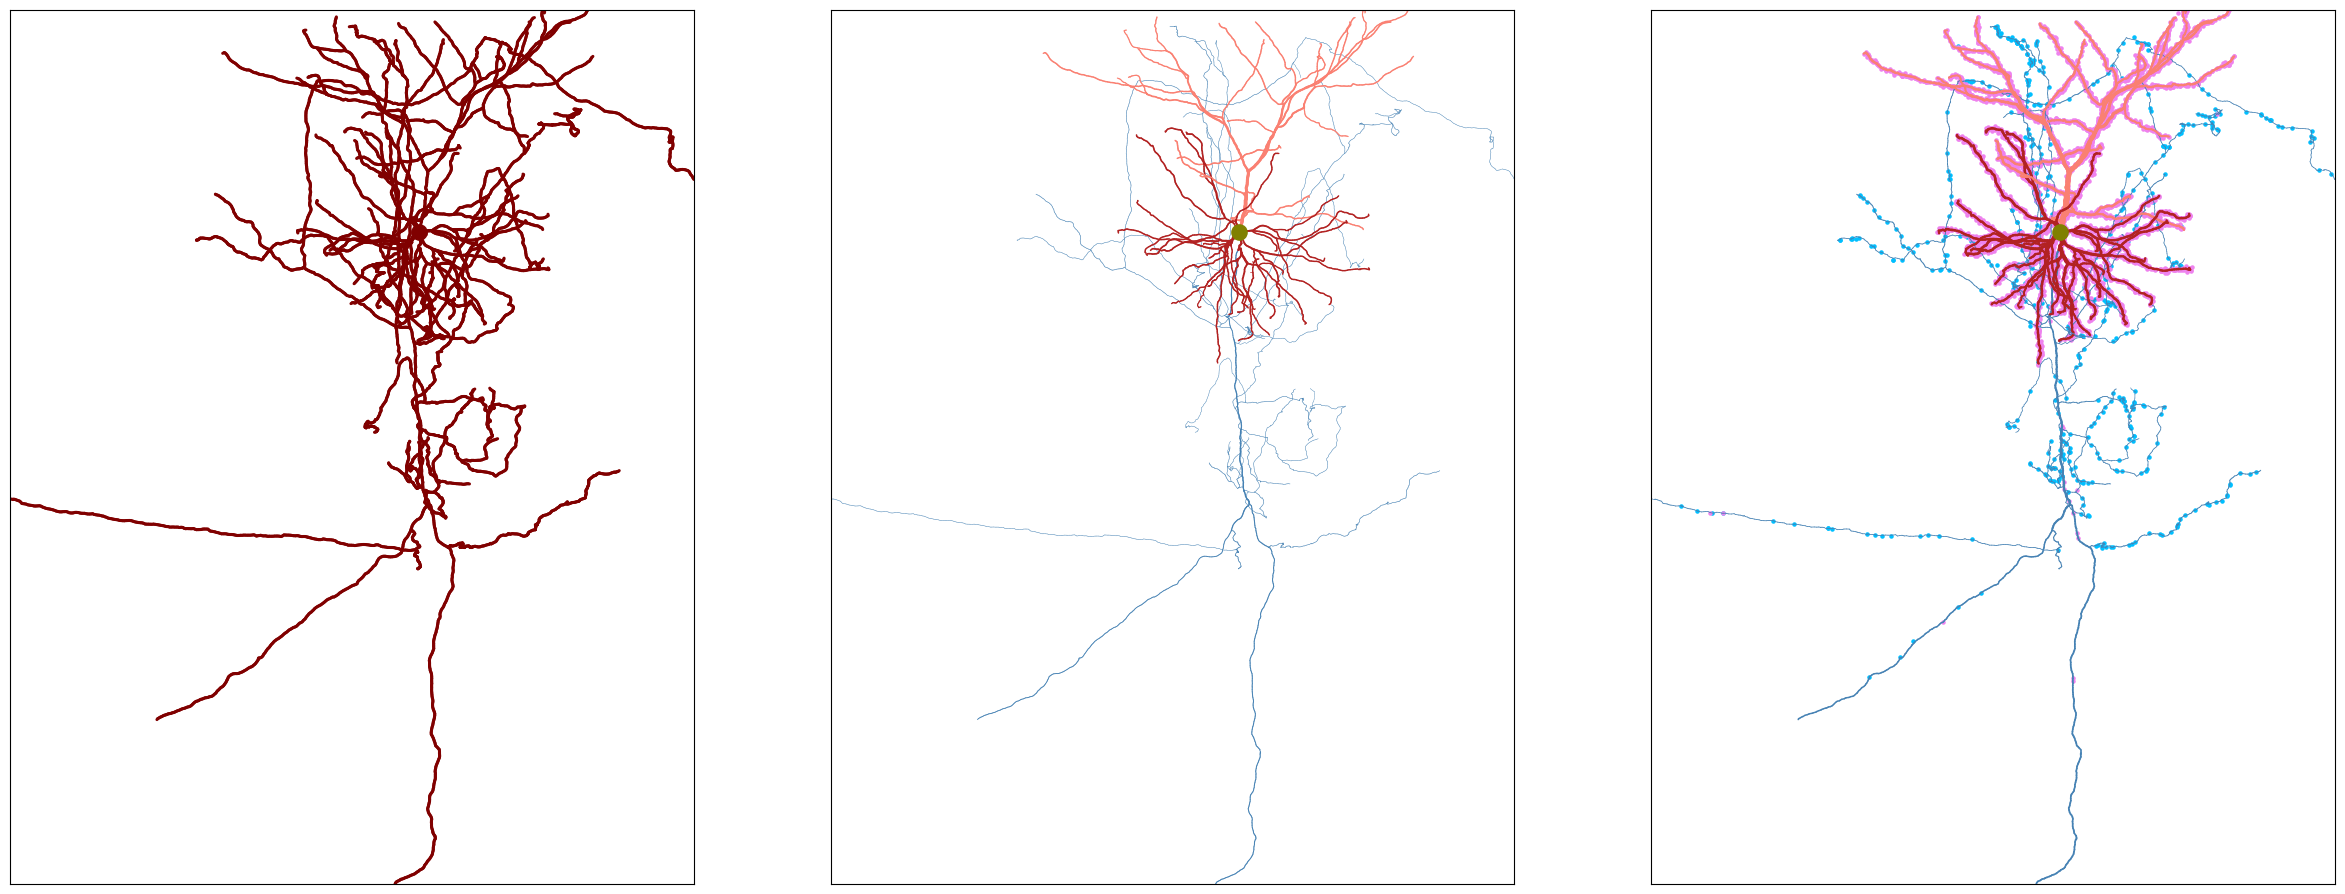

In [21]:
# plot three skeletons with subplots
rid = 864691134884807418
sid = 518848
sk = skel_io.read_skeleton(skel_path + f"{rid}_{sid}", f"{rid}_{sid}.swc")

filename = f"{rid}_{sid}/{rid}_{sid}.h5"
mw = skel_io.load_mw(mw_path, filename)

f, ax = plt.subplots(1, 3, figsize=(30, 30))

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])


skelplot.plot_tools.plot_verts(
    sk.vertices,
    sk.edges,
    ax=ax[0],
    invert_y=True,
    line_width=2.2,
    color="maroon",
    plot_soma=True,
)


skelplot.plot_tools.plot_skel(
    sk,
    ax=ax[1],
    pull_radius=True,
    pull_compartment_colors=True,
    invert_y=True,
    plot_soma=True,
    line_width=3,
    color="darkslategray",
)


skelplot.plot_tools.plot_mw_skel(
    mw,
    ax=ax[2],
    pull_radius=True,
    invert_y=True,
    line_width=5,
    plot_soma=True,
    pull_compartment_colors=True,
    plot_presyn=True,
    plot_postsyn=True,
)
